In [1]:
import matplotlib.pyplot as plt
import numpy as np
from spa.core import spa
from spa.properties import ThresholdProperty

In [6]:
file = open("../data/false_positives/false_positives.txt", "r")
avg_nums = [float(x) for x in file.readline().split(",")]
accuracy = [float(x) for x in file.readline().split(",")]


In [11]:
def success_func(x):
    return 1 if x > 0.625 else 0

is_correct = [success_func(x) for x in accuracy]

In [13]:
# Sort into correct and incorrect lists
correct = []
incorrect = []
for i in range(len(avg_nums)):
    if is_correct[i]:
        correct.append(avg_nums[i])
    else:
        incorrect.append(avg_nums[i])


[1.186, 1.198, 1.213, 1.22, 1.245, 1.27, 1.284, 1.3, 1.31]

In [24]:
# Run SPA on the correct and incorrect lists
proportion = 0.5
conf = 0.9

result_correct = spa(correct, ThresholdProperty(op='<'), prob_threshold=proportion, confidence=conf)
result_incorrect = spa(incorrect, ThresholdProperty(op='<'), prob_threshold=proportion, confidence=conf)

low_correct = result_correct.confidence_interval.low
high_correct = result_correct.confidence_interval.high
low_incorrect = result_incorrect.confidence_interval.low
high_incorrect = result_incorrect.confidence_interval.high

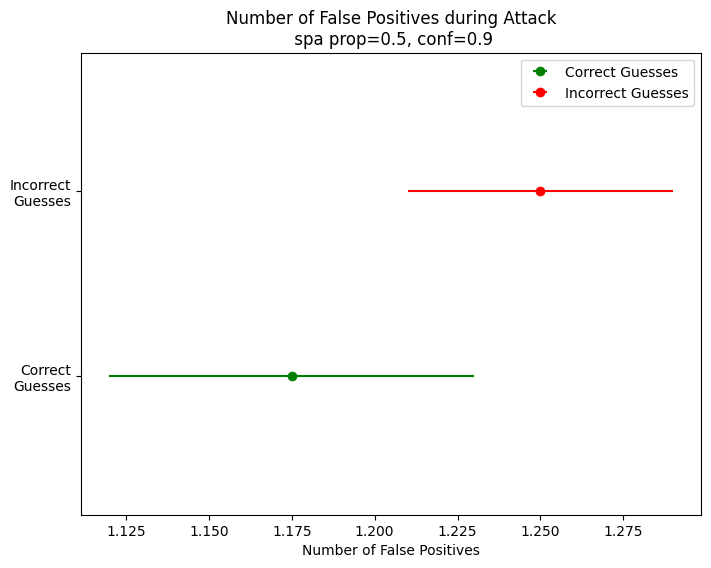

In [25]:
# Make the Plot
custom_labels = ["Correct\nGuesses", "Incorrect\nGuesses"]

plt.figure(figsize=(8, 6))
plt.title(f"Number of False Positives during Attack\n spa prop={proportion}, conf={conf}")
plt.errorbar([(low_correct + high_correct) / 2], [0.3], xerr=[[(high_correct - low_correct) / 2]], fmt='o', label='Correct Guesses', color='green')
plt.errorbar([(low_incorrect + high_incorrect) / 2], [0.7], xerr=[[(high_incorrect - low_incorrect) / 2]], fmt='o', label='Incorrect Guesses', color='red')
plt.xlabel("Number of False Positives")
plt.yticks([0.3, 0.7], custom_labels)
plt.ylim(0, 1)
# plt.xlim(3500, 5000)
plt.legend()

plt.savefig(f"../figures/false_positives_{proportion}prop_{conf}conf.png")